# week1-session3 栗まんじゅう問題

# 【問題】栗まんじゅうが太陽系を覆う日
1個の栗まんじゅうにバイバインを振りかけた場合、太陽系が栗まんじゅうで覆われるのは何分後でしょうか。これを計算するプログラムを作成してください。栗まんじゅうや太陽系の体積を調査した上で仮定して計算してください。栗まんじゅうの隙間や重力などは考えず、問題を単純化して構いません。
ボールにバイバインを振りかけた時、東京ドームが一杯になる時間など他の状況にも適用できるような汎用的なプログラムを作成してください。また、グラフを表示するなど分かりやすいノートブックを作成してください。

## 【課題1-1】太陽系が栗まんじゅうで覆われる時間のプログラム

栗まんじゅうの体積の計算式(mmからmへの単位も変換)

In [80]:
def manju(data):
    manju_size = (data[0][0] / 1000) * (data[0][1] / 1000) * (data[0][2] / 1000)
    return manju_size

スペースの体積の計算式

In [81]:
def space(data):
    space_size = 4 / 3 * 3.14 * (data[1][0] ** 3)
    return space_size

バイバインで増加した回数の計算式

In [82]:
import numpy as np

def baybayin(data):
    manju_size = manju(data)
    space_size = space(data)
    n = np.log2(space_size / manju_size)
    return np.ceil(n)  

太陽系のサイズ（m)

In [83]:
# 太陽系の体積（仮）
# 太陽の中心から海王星までの距離を半径とした球体と仮定する
sun_r = 1400000000 / 2
neptune = 4500000000000
r = (sun_r + neptune)
print(r)

4500700000000.0


栗まんじゅうが太陽系を覆う時間の計算式

In [84]:
# サイズのデータ＝[栗まんじゅうのサイズ（mm)],[太陽系サイズ(m)]
size_data = [[60, 40, 30], [r]]

n = int(baybayin(size_data))
print(f"栗まんじゅうが太陽系を覆うのに、{n*5}分掛かります。")

栗まんじゅうが太陽系を覆うのに、710分掛かります。


## 【課題1-2】課題1-1のグラフ

課題１のリストを作成

In [100]:
cap = []
total = 0
for i in range(1, n+1):
    y = 1 * 2 ** (i-1)
    total += y * manju(size_data)
    cap.append(total)

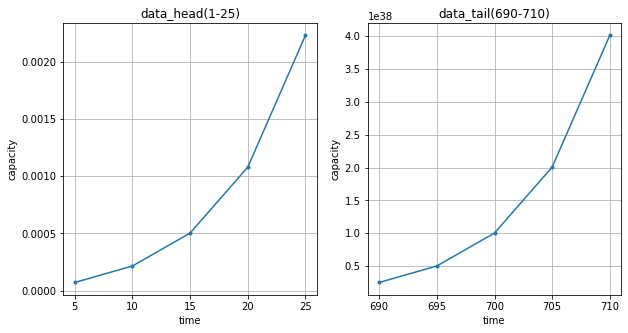

In [103]:
import matplotlib.pyplot as plt

time = [i*5 for i in range(1,n+1)]

figue,(Left,Right) = plt.subplots(ncols=2, figsize=(10, 5))

Left.plot(time[:5], cap[:5],marker=".")
Left.set_title("data_head(1-25)")
Left.set_xlabel("time")
Left.set_ylabel("capacity")
Left.grid(True)

Right.plot(time[-5:], cap[-5:],marker=".")
Right.set_title("data_tail(690-710)")
Right.set_xlabel("time")
Right.set_ylabel("capacity")
Right.grid(True)